In [1]:
# Load the .CSV file of the waveform
import csv
import os

import matplotlib.pyplot as plt
import numpy as np
import math

# Parameters
top_level=f'{os.getcwd()}/..'
path    = f'{top_level}/data/RefCurve_2023-08-15_1_192110.Wfm.csv'
size    = 100032 # Number of data points in the file
timeBin = 1E-3 # Unit of ns
freqBin = (0.5E+3/timeBin)/float(size//2) # Units of MHz
adcLsb  = 500.0/float(2**15) # units of mV

timeSteps = np.linspace(0, timeBin*(size-1), num=size)
waveformFp = np.zeros(shape=size, dtype=np.float32, order='C')
waveformAdc = np.zeros(shape=size, dtype=np.int16, order='C')

with open(path) as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quoting=csv.QUOTE_NONE)
    for i, row in enumerate(reader):
        waveformFp[i] = float(row[0])
        waveformAdc[i] = 100*int((waveformFp[i]*1E3)/adcLsb)

# Calculate the FFT  (full rate)
freqSteps = np.linspace(0, freqBin*(size//2-1), num=size//2)
freq = np.fft.fft(waveformAdc)/float(len(waveformAdc))
freq = freq[range(len(waveformAdc)//2)]
mag = 20.0*np.log10(np.abs(freq)/32767.0) # Units of dBFS

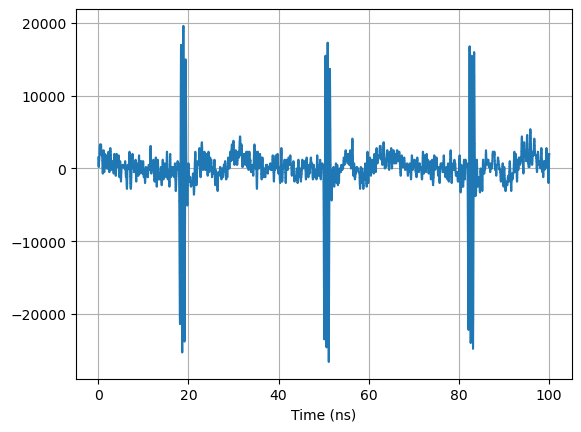

In [2]:
# Plot the time waveform (full rate)
plt.plot(timeSteps,waveformAdc)
plt.xlabel("Time (ns)")
plt.grid()

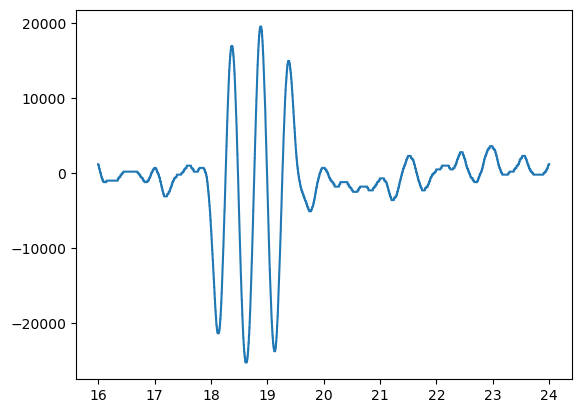

In [3]:
# Plot the time waveform butzoomed in  (full rate)
plt.plot(timeSteps[16000:24000],waveformAdc[16000:24000])

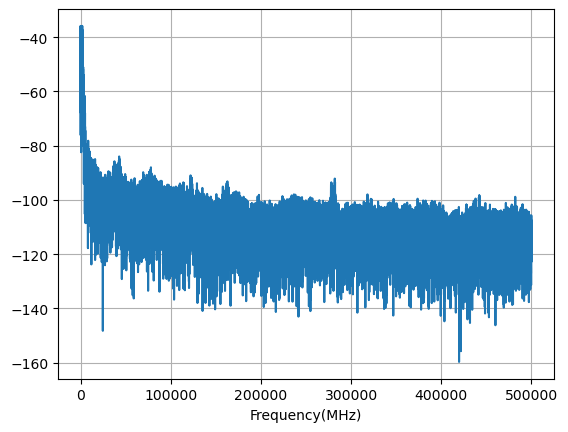

In [4]:
# Plot the FFT waveform  (full rate)
plt.plot(freqSteps,mag)
plt.xlabel("Frequency(MHz)")
plt.grid()

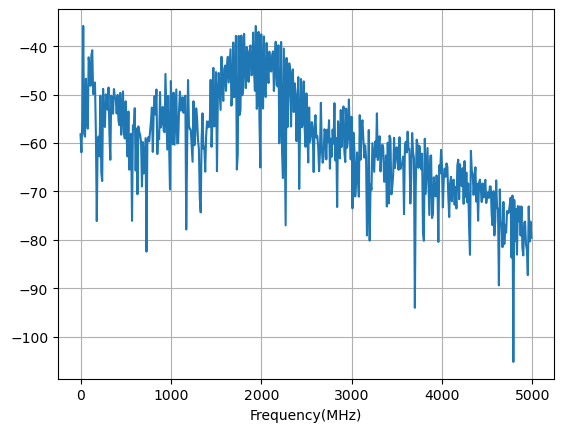

In [5]:
# Plot the FFT waveform but zoomed in (full rate)
plt.plot(freqSteps[:500],mag[:500])
plt.xlabel("Frequency(MHz)")
plt.grid()

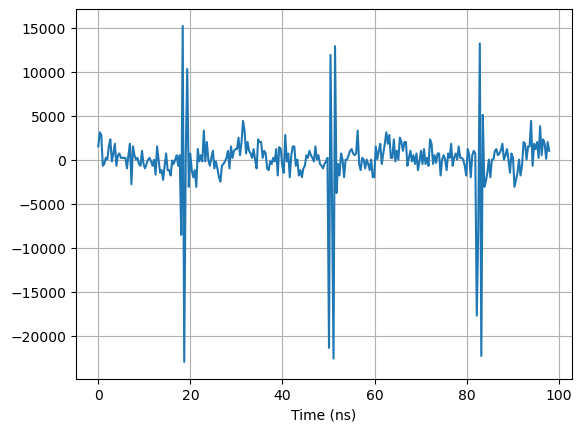

In [6]:
#  linear interpolation for this data at 3.054 GSPS
newTimeBin = 1.0/(0.509*6.0) # Unit of ns for 3.054 GSPS
newFreqBin = (0.5E+3/timeBin)/float(size//2) # Units of MHz
newSize    = 300
newTimeSteps = np.linspace(0, newTimeBin*(newSize-1), num=newSize)

newWaveformAdc = np.int16(np.interp(newTimeSteps, timeSteps, waveformAdc))
# Plot the time waveform (RFSoC rate)
plt.plot(newTimeSteps,newWaveformAdc)
plt.xlabel("Time (ns)")
plt.grid()

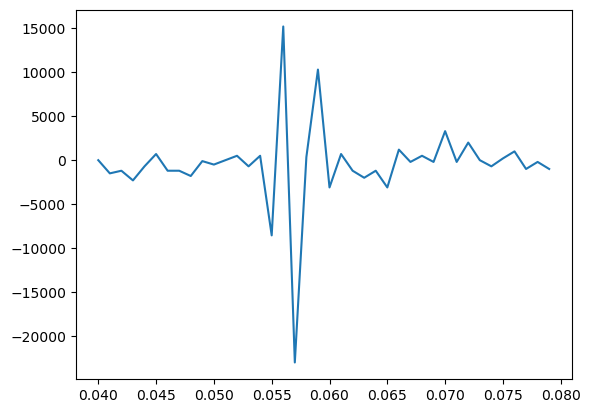

In [7]:
# Plot the time waveform but zoomed in (3.054 GSPS)
plt.plot(timeSteps[40:80],newWaveformAdc[40:80])

In [8]:
# Write the RFDC data interpolated at 3.054 GSPS to file
path = f'{top_level}/data/RefCurve_3054MSPS.csv'
with open(path, 'w') as f:
    for smpl in newWaveformAdc:
        f.write(f'{smpl}\n')